<a href="https://colab.research.google.com/github/SampritiMayra/Data_Analysis_prep/blob/main/Uber_Fare_Prediction_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:**
The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
#%matplotlib inline 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression  # for Linear Regression algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #for checking the model accuracy

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
##Importing Dataset
df = pd.read_csv('/content/gdrive/MyDrive/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
# always create a copy 
data = df.copy()
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Cleaning the Data

In [ ]:
data.drop(['Unnamed: 0', 'key'], axis = 1 , inplace = True)

In [ ]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
data.keys()

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [ ]:
data.shape

(200000, 7)

In [ ]:
#info about missing values in the dataset
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Generating Dataset Report using Pandas

In [ ]:
!pip install pandas-profiling[notebook,html]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 119.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 96.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

<ipython-input-12-20e4261384b0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
profile = ProfileReport(data)
profile.to_file(output_file = "Uber_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()

In [ ]:
data.dropna(axis = 0, inplace = True)

In [ ]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [ ]:
data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
# we will extract time feature from the 'pickup_datetime' 

#Read the blog at https://www.aboutdatablog.com/post/extracting-features-from-dates-in-pandas

#From the above output, we see that the data type of 'pickup_datetime' is 'object
#But according to data definition, 'pickup_datetime'is a date time stamp variable, which is wrongly interpreted as 'object', so we will convert this variable data type to 'datetime'.
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)

data['year'] = data.pickup_datetime.dt.year
data['month'] = data.pickup_datetime.dt.month
data['weekday'] = data.pickup_datetime.dt.weekday
data['hour'] = data.pickup_datetime.dt.hour

In [ ]:
data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
month                              int64
weekday                            int64
hour                               int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
 7   year               199999 non-null  int64              
 8   month              199999 non-null  int64              
 9   weekday            199999 non-null  int64              
 10  hour               199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(5)
memory usage: 18.3 MB


In [ ]:
data.dropna(axis = 0, inplace = True)

In [ ]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
weekday              0
hour                 0
dtype: int64

In [ ]:
from math import *

In [ ]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [ ]:
data['dist_travel_km'] = distance_transform(data['pickup_longitude'].to_numpy(),
                                                data['pickup_latitude'].to_numpy(),
                                                data['dropoff_longitude'].to_numpy(),
                                                data['dropoff_latitude'].to_numpy()
                                              )

In [ ]:
#check the dataset
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450


**Importance of detecting an outlier**

An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease. Let us detect the extreme values in the data.

The following can be considered as outliers in this case study:

Amount < -52

Trips with travel distance less than or equal to 0, and more than 130Kms

Trips where 90< latitude <-90, 180 < longitude < -180

Trips where no. of passengers = 0

In [ ]:
# Minimum Fare is in negative which is not possible so, we need to remove those values from the dataset
# Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.

[Text(0, 0, 'fare_amount'),
 Text(1, 0, 'pickup_longitude'),
 Text(2, 0, 'pickup_latitude'),
 Text(3, 0, 'dropoff_longitude'),
 Text(4, 0, 'dropoff_latitude'),
 Text(5, 0, 'passenger_count'),
 Text(6, 0, 'year'),
 Text(7, 0, 'month'),
 Text(8, 0, 'weekday'),
 Text(9, 0, 'hour'),
 Text(10, 0, 'dist_travel_km')]

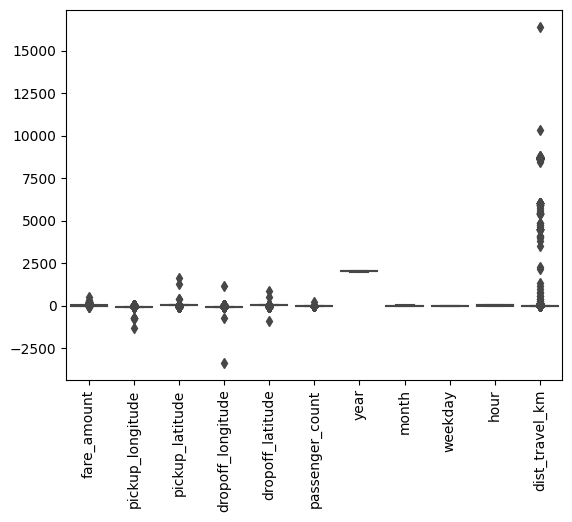

In [ ]:
# outliers detection using boxplot
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)



In [ ]:
# now we can drop the pickup_datetime variable beacause now we got the distance 
#and it becomes redundant now. 
data = data.drop('pickup_datetime', axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   year               199999 non-null  int64  
 7   month              199999 non-null  int64  
 8   weekday            199999 non-null  int64  
 9   hour               199999 non-null  int64  
 10  dist_travel_km     199999 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 18.3 MB


In [ ]:
#We will only keep the observation where fare is greater than 0
data = data.loc[(df.fare_amount >= 0)]

In [ ]:
#We will only keep the observation where travel distance is less than or equal to 130, as that is the limit for trips.
data = data.loc[(data.dist_travel_km >= 1) & (data.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", data.shape)

Remaining observastions in the dataset: (163645, 11)


In [ ]:
#We will only keep the observation where no. of passengers is greater than 0 and less than 7
data = data.loc[(data.passenger_count >0) & (data.passenger_count < 7)]
print("Remaining observastions in the dataset:", data.shape)

Remaining observastions in the dataset: (163070, 11)


In [ ]:
data.shape

(163070, 11)

In [ ]:
Q1 = data['pickup_longitude'].quantile(0.25)
Q3 = data['pickup_longitude'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.024078750000001037

In [ ]:
print("Shape of dataset before removing outliers = ", data.shape)

Shape of dataset before removing outliers =  (163070, 11)


In [ ]:
data = data[((data['pickup_longitude']) >= (Q1 - 1.5 * IQR)) | ((data['pickup_longitude']) <= (Q3 + 1.5 * IQR))]
print("Shape of dataset after removing outliers = ", data.shape)

Shape of dataset after removing outliers =  (163070, 11)


In [ ]:
Q1 = data['pickup_latitude'].quantile(0.25)
Q3 = data['pickup_latitude'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.03207725000000039

In [ ]:
data = data[((data['pickup_latitude']) >= (Q1 - 1.5 * IQR)) | ((data['pickup_latitude']) <= (Q3 + 1.5 * IQR))]
print("Shape of dataset after removing outliers = ", data.shape)

Shape of dataset after removing outliers =  (163070, 11)


In [ ]:
Q1 = data['dropoff_latitude'].quantile(0.25)
Q3 = data['dropoff_latitude'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.034124749999996595

In [ ]:
data = data[((data['dropoff_latitude']) >= (Q1 - 1.5 * IQR)) | ((data['dropoff_latitude']) <= (Q3 + 1.5 * IQR))]
print("Shape of dataset after removing outliers = ", data.shape)

Shape of dataset after removing outliers =  (163070, 11)


In [ ]:
Q1dl = data['dropoff_longitude'].quantile(0.25)
Q3dl = data['dropoff_longitude'].quantile(0.75)
IQR = Q3dl - Q1dl
IQR

0.027101000000001818

In [ ]:
data = data[((data['dropoff_longitude']) >= (Q1 - 1.5 * IQR)) | ((data['dropoff_longitude']) <= (Q3 + 1.5 * IQR))]
print("Shape of dataset after removing outliers = ", data.shape)

Shape of dataset after removing outliers =  (163070, 11)


In [ ]:
Q1d = data['dist_travel_km'].quantile(0.25)
Q3d = data['dist_travel_km'].quantile(0.75)
IQRn = Q3d - Q1d
IQRn

2.788241533036698

In [ ]:
data = data[((data['dist_travel_km']) >= (Q1 - 1.5 * IQRn)) | ((data['dist_travel_km']) <= (Q3 + 1.5 * IQRn))]
print("Shape of dataset after removing outliers = ", data.shape)

Shape of dataset after removing outliers =  (163070, 11)


In [ ]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
weekday              0
hour                 0
dist_travel_km       0
dtype: int64

Predictive Modelling

In [ ]:
# We will split the data into training and testing data
# select only the target variable 'amount' and store it in dataframe 'y'
Y = pd.DataFrame(data['fare_amount'])


In [ ]:
X = data.drop('fare_amount', axis = 1)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=0)

train_x.shape, train_y.shape

((130456, 10), (130456, 1))

In [ ]:
model = linear_model.LinearRegression()
model

LinearRegression()

In [ ]:
model.fit(train_x, train_y)

LinearRegression()

In [ ]:
y_pred = model.predict(test_x)
y_pred

array([[11.08389257],
       [ 6.54860694],
       [11.39626698],
       ...,
       [ 6.25740224],
       [17.99521975],
       [10.1110093 ]])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# mean_squared_error
mean_squared_error(test_y,y_pred)

32.27843704100101

In [ ]:
# r2 score
r2_score(test_y,y_pred)

In [ ]:
from joblib import dump, load
dump(model, 'Uber_Fare.joblib')

['Uber_Fare.joblib']